In [10]:
import numpy as np
import math


Ny = 70                  #задать кол-во отрезков по y (узлов плюс еще нулевой будет!)
Nx = 70                  #задать кол-во отрезков по x
Nt = 500                #кол-во отрезков по t, на самом деле будет +1 слой по времени
ht = 10**(-2)            #длина отрезка по времени
y = np.linspace(0, 1, Ny+1)
x = np.linspace(0, 1, Nx+1)
t = np.linspace(0, Nt*ht, Nt+1)
Lx = x[Nx]-x[0]
Ly = y[Ny]-y[0]
u = np.zeros((Nx+1, Ny+1, Nt+1))
hx = Lx/Nx
hy = Ly/Ny

def f(x,y):                #функция правой части
    return(math.exp(x*y)*(x**2+y**2-8*(math.pi**2))*np.cos(2*math.pi*(x+y))-4*math.pi*(math.exp(x*y))*(x+y)*np.sin(2*math.pi*(x+y)))

Utoch= np.zeros((Nx+1, Ny+1))          #точное решение (на той же сетке!)
for i in range(Nx+1):
    for j in range(Ny+1):
        Utoch[i,j]= math.exp(x[i]*y[j])*np.cos(2*math.pi*(x[i]+y[j]))
#c=Utoch[Nx,0]
c= 1
        
for i in range(Ny+1):                  #на нулевом уровне по времени
    for k in range(Nx+1):
        u[k,i,0]=c
    u[0,i,0]=Utoch[0,i]
    u[Nx,i,0]=Utoch[Nx,i]
for i in range(Nx+1): 
    u[i,0,0]=Utoch[i,0]
    u[i,Ny,0]=Utoch[i,Ny]

In [11]:
u12= np.zeros((Nx+1, Ny+1))
for i in range(Ny+1): 
    u12[0,i]=Utoch[0,i]
    u12[Nx,i]=Utoch[Nx,i]
for i in range(Nx+1): 
    u12[i,0]=Utoch[i,0]
    u12[i,Ny]=Utoch[i,Ny]

for n in range(Nt):              #фиксируем время
    
    for i in range(Ny+1):                   #задаем краевые условия такие же, как при t=0, /они по идее всегда должны выполнятся/
        u[0,i,n+1]=Utoch[0,i]
        u[Nx,i,n+1]=Utoch[Nx,i]
    for i in range(Nx+1): 
        u[i,0,n+1]=Utoch[i,0]
        u[i,Ny,n+1]=Utoch[i,Ny]
                                #здесь должна быть прогонка:
    
    ax= ht/(2*(hx**2))
    bx= (-ht/(hx**2))-1
    cx= ht/(2*(hx**2))
    ay= ht/(2*(hy**2))
    by= (-ht/(hy**2))-1
    cy= ht/(2*(hy**2))
    for j1 in range(Ny-1):                  #считаем для каждого фиксированного слоя по у 
        j= j1+1                           #считаем с первого и до предпоследнего, нулевой и последний уже посчитаны - это граничные условия                
        aix= np.zeros(Nx+1)              #считаем альфа и бетта
        bix= np.zeros(Nx+1)                 #нулевой и первый элемент массива не нужны, оставим их нулями. всего этих бетта Nx-1 штука
        dix= np.zeros(Nx)               #этих с 1 по Nx-1 (всего Nx-1) 
        for i1 in range(Nx-1):
            i=i1+1
            dix[i]= (-ht/(2*hy**2))*u[i,j-1,n]+(ht/(hy**2)-1)*u[i,j,n]-(ht/(2*hy**2))*u[i,j+1,n]+f(x[i],y[j])*ht/2
        aix[2]= -cx/bx
        bix[2]= dix[1]/bx-(ax/bx)*u[0,j,n]      
        for i1 in range(Nx-2):
            i=i1+2                        #чтобы сразу с третьего начал считать
            aix[i+1]= -cx/(ax*aix[i]+bx)
            bix[i+1]= (dix[i]-bix[i]*ax)/(ax*aix[i]+bx)
        for i1 in range(Nx-1):
            i= Nx-i1-1                      #i от 1 до Nx-1
            u12[i,j]=aix[i+1]*u12[i+1,j]+bix[i+1]
            
    for j1 in range(Nx-1):                  #считаем для каждого фиксированного слоя по x 
        j= j1+1                           #считаем с первого и до предпоследнего, нулевой и последний уже посчитаны - это граничные условия            
        biy= np.zeros(Ny+1)                #считаем альфа и бетта
        aiy= np.zeros(Ny+1)                 #нулевой и первый элемент массива не нужны, оставим их нулями. всего этих бетта Ny-1 штука
        diy= np.zeros(Ny)               #этих с 1 по Ny-1 (всего Ny-1) 
        for i1 in range(Ny-1):
            i=i1+1
            diy[i]= (-ht/(2*hx**2))*u12[j-1,i]+(ht/(hx**2)-1)*u12[j,i]-(ht/(2*hx**2))*u12[j+1,i]+f(x[j],y[i])*ht/2
        aiy[2]= -cy/by
        biy[2]= diy[1]/by-(ay/by)*u[j,0,n]      
        for i1 in range(Ny-2):
            i=i1+2                        #чтобы сразу с третьего начал считать
            aiy[i+1]= -cy/(ay*aiy[i]+by)
            biy[i+1]= (diy[i]-biy[i]*ay)/(ay*aiy[i]+by)   
        for i1 in range(Ny-1):
            i= Ny-i1-1                      #i от Ny-1 до 1
            u[j,i,n+1]=aiy[i+1]*u[j,i+1,n+1]+biy[i+1]

In [12]:
E = np.zeros((Nx+1, Ny+1))
Em =np.zeros(Ny+1)
for i in range(Ny):                  
    for k in range(Nx):
        E[k,i]= abs(u[k,i,Nt]-Utoch[k,i])
        Em[i]=max(E[i])
        
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(E)
print(max(Em))
print(c)

0.0013064127942736814
1


70 70 500


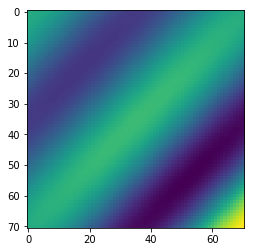

In [8]:
u0 = np.zeros((Nx+1, Ny+1))
for i in range(Ny+1):                  
    for k in range(Nx+1):
        u0[k,i]= u[k,i,Nt]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(u0)
print(Nx,Ny,Nt)

In [4]:
u0 = np.zeros((Nx+1, Ny+1))
for i in range(Ny):                  
    for k in range(Nx):
        u0[k,i]= u[k,i,0]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(u0) 

60 60 100


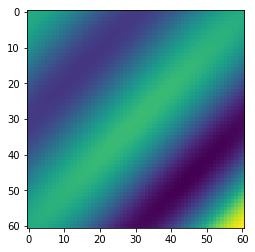

In [5]:
u0 = np.zeros((Nx+1, Ny+1))
for i in range(Ny+1):                  
    for k in range(Nx+1):
        u0[k,i]= u[k,i,Nt]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(u0)
print(Nx,Ny,Nt)

In [6]:
u0 = np.zeros(Ny+1)
u1 = np.zeros(Ny+1)
for i in range(Ny):                  
    #for k in range(Nx):
        u0[i]= u[10,i,Nt]
        u1[i]= Utoch[10,i]

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(u0)
plt.plot(u1)

In [7]:
#Utoch= np.zeros((100, 100))
#for i in range(100):
#    for j in range(100):
#        Utoch[i,j]= math.exp(x[i]*y[j])*np.cos(2*math.pi*(x[i]+y[j]))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(Utoch)

0.016123628238909227


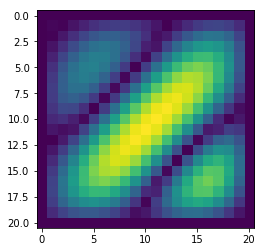

In [35]:
E = np.zeros((Nx+1, Ny+1))
Em =np.zeros(Ny+1)
for i in range(Ny):                  
    for k in range(Nx):
        E[k,i]= abs(u[k,i,Nt]-Utoch[k,i])
        Em[i]=max(E[i])
        
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(E)
print(max(Em))
